## Tutorial #1
- Generate molecules with YAML
- Analyze the result

# Generate molecules with YAML

In [1]:
# Imports (may take some time on the first run)

import sys
repo_root = "../../"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

import os
from generator import Generator
from utils import conf_from_yaml, generator_from_conf

<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterHierarchyMatcher> already registered; second conversion method ignored.
/opt/anaconda3/envs/v3env-m/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Generate molecules

yaml_path = "config/mcts/example.yaml" # Specify the yaml path. Open the file to see setting options.

conf = conf_from_yaml(yaml_path)
generator = generator_from_conf(conf)
generator.generate(time_limit=conf.get("time_limit"), max_generations=conf.get("max_generations"))

seed: 3757880127


Starting generation...
<Best reward updated> 1 - time: 0.00, reward: 0.6367, node: O=C(N/N=C\c1ccccc1)c1ccc2cc[nH]c2c1
<Best reward updated> 2 - time: 0.16, reward: 0.6492, node: Cc1cc(C)cc(NC(=O)C(=O)N[C@@H](C)CCCc2ccccc2)c1
<Best reward updated> 6 - time: 0.19, reward: 0.7517, node: O=C1/C(=C\c2ccccc2Cl)SC(=S)N1c1ccccc1
<Best reward updated> 93 - time: 0.80, reward: 0.7601, node: O=S(=O)(c1c(-c2cc(F)ccc2F)oc2ccccc12)N1CCC(c2cccs2)CC1
<Best reward updated> 100 - time: 0.85, reward: 0.7729, node: O=S(=O)(c1c(-c2cc(Cl)ccc2Cl)oc2ccccc12)N1CCN(c2ccccc2)CC1
<Best reward updated> 108 - time: 0.93, reward: 0.7812, node: O=S(=O)(c1c(-c2cc(Br)ccc2F)[nH]c2ccccc12)N1CCN(Cc2cc(Cl)ccc2Cl)CC1
<Best reward updated> 114 - time: 0.98, reward: 0.7910, node: O=[N+]([O-])c1ccc(Cl)c(-c2oc3ccccc3c2S(=O)(=O)c2ccc3ccccc3c2)c1
<Best reward updated> 120 - time: 1.03, reward: 0.8204, node: O=S(=O)(c1c(-c2cc(Cl)c(Cl)cc2Cl)oc2ccccc12)N1CCC(c2nc3ccccc3s2)CC1
200 - time: 1.68, average over 100: 0.5460
<Best reward 

# Analyze the result

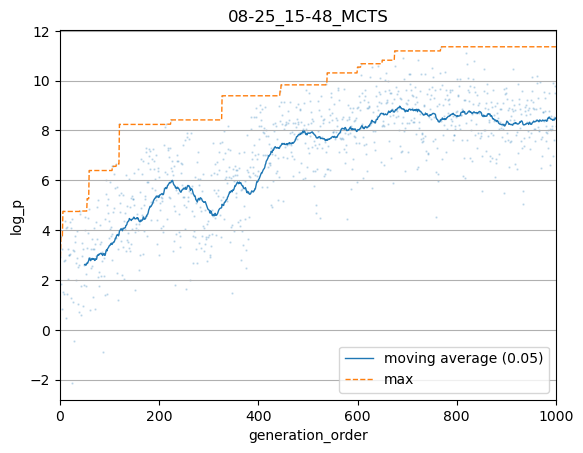

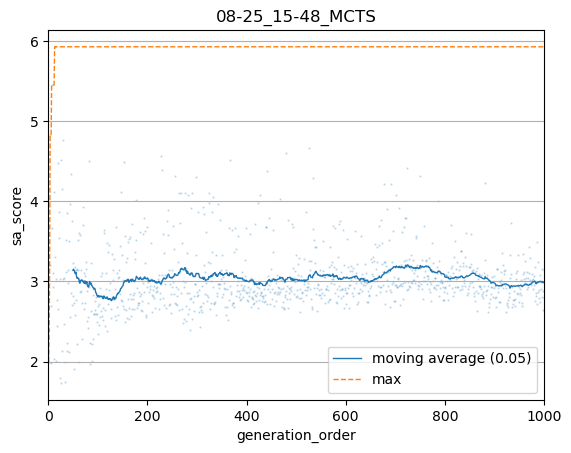

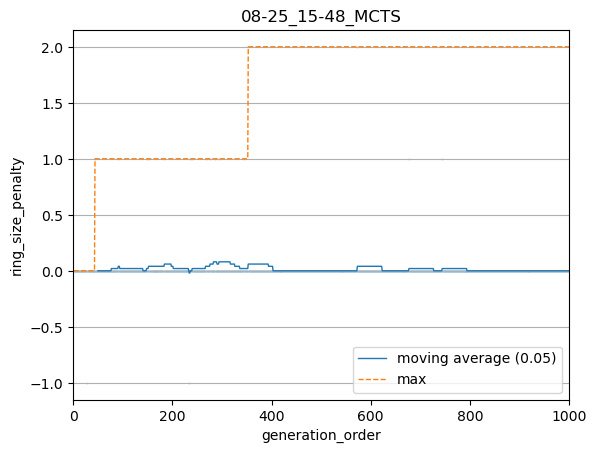

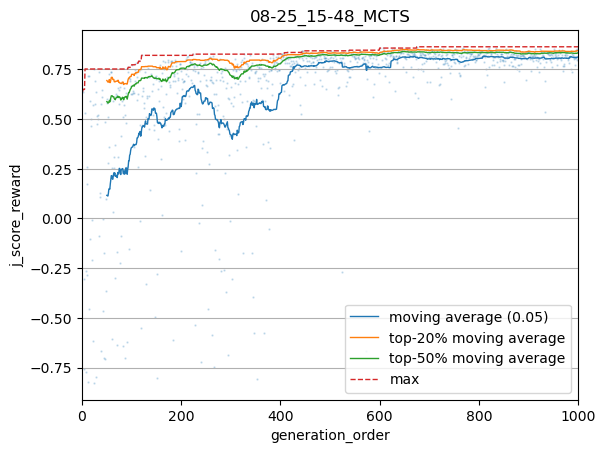

In [3]:
# Plot results

# Plots will also be saved to the output folder.
generator.plot(moving_average_window=0.05, reward_top_ps=[0.2, 0.5])
# generator.plot(**conf.get("plot_args", {})) # Use plot_args specified in yaml

In [4]:
# Return the generation results as a pandas.DataFrame

df = generator.df()
df

,order,time,key,reward,log_p,sa_score,ring_size_penalty
0,1,0.000908,O=C(N/N=C\c1ccccc1)c1ccc2cc[nH]c2c1,0.636739,2.93180,1.994456,0
1,2,0.157023,Cc1cc(C)cc(NC(=O)C(=O)N[C@@H](C)CCCc2ccccc2)c1,0.649247,3.76954,2.398076,0
2,3,0.164516,NC(=O)[C@@H]1CCN(C(=O)c2ccc[nH]2)[C@@H]1c1ccc(...,-0.305922,1.84250,3.201115,0
3,4,0.179677,[NH3+][C@H]1CC[C@@H](Nc2ccc(C[NH+]3CCCCC3)cc2)C1,-0.754661,0.83030,4.822630,0
4,5,0.185051,COc1ccccc1NC(=O)[C@H](Cc1ccccc1)NS(=O)(=O)c1cc...,0.529346,3.22820,2.692811,0
...,...,...,...,...,...,...,...
995,996,9.469024,O=S(=O)(c1cc(Br)co1)c1c(-c2cc(Br)sc2-c2ccc(Br)...,0.809331,8.54160,3.159737,0
996,997,9.491313,O=S(=O)(c1cc(O)ccc1O)c1c(-c2cc(Br)sc2-c2ccc(Br...,0.796860,7.59730,2.881903,0
997,998,9.506826,O=S(=O)(c1ccc(OCc2ccccc2)cc1)c1c(-c2cc(Br)sc2-...,0.850759,9.76510,2.649217,0
998,999,9.512783,O=S(=O)(c1ccc(OC2CCCC2)cc1)c1c(-c2cc(Br)sc2-c2...,0.842570,9.50750,2.791900,0


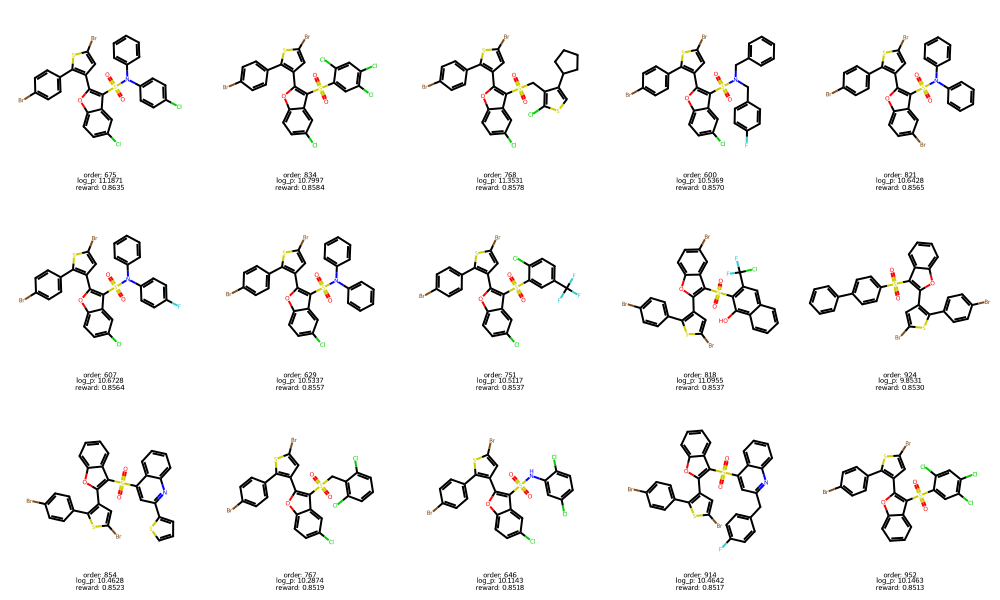

In [6]:
# Display generated molecules

generator.display_top_k_molecules(k=15, target="reward", legends=["order", "log_p", "reward"], mols_per_row=5, size=(200,200))

In [ ]:
# Statistics.

print("Number of generated nodes: ", generator.n_generated_nodes())
print("Generated node per second: ", generator.node_per_sec())
print("Proportion of unfiltered generated nodes: ", generator.node_per_sec())
print("Average reward of top_p generated nodes: ", generator.average_reward(top_p=0.5))
print("AUC of the average of top_k rewards within 1000 generation: ", generator.auc(top_k=5, max_oracle_calls=1000)) # Assumes all rewards lie within the range [0, 1].

Number of generated nodes:  1000
Generated node per second:  85.13998249783619
Proportion of unfiltered generated nodes:  85.13998249783619
Average reward of top_p generated nodes:  0.8072061178107823
AUC of the average of top_k rewards within 1000 generation:  0.7784183909396751
